# IPCV LAB3
# AAYUSHI SINGH
# 60009220202
# D025

Aim: To perform image enhancement in spatial domain using point processing
techniques: contrast stretching, log transformation, power law transformation

# 1. Import Necessary Libraries

In [ ]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


# Using Mnist dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Select a random image from the dataset

In [3]:
np.random.seed(42)
random_index = np.random.randint(0, len(train_images))
image = train_images[random_index]

# Display the original image

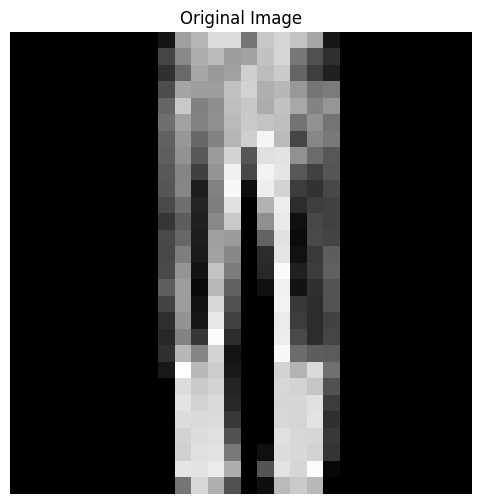

In [4]:
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [5]:
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * (255 / cdf[-1])
    equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized).reshape(image.shape)
    return equalized_image.astype(np.uint8)

equalized_image = histogram_equalization(image)

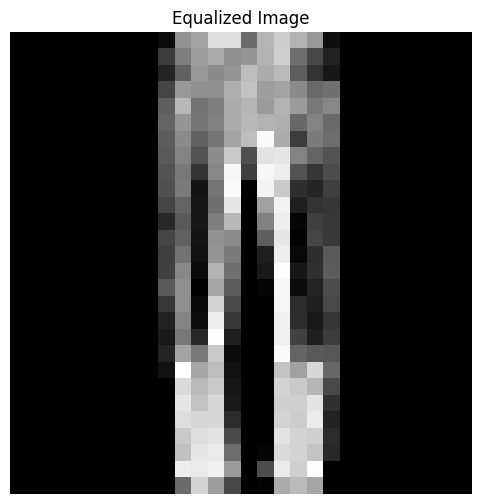

In [6]:
plt.figure(figsize=(6, 6))
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.show()

In [7]:
def histogram_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched_image = (image - min_val) * (255 / (max_val - min_val))
    return stretched_image.astype(np.uint8)

stretched_image = histogram_stretching(image)

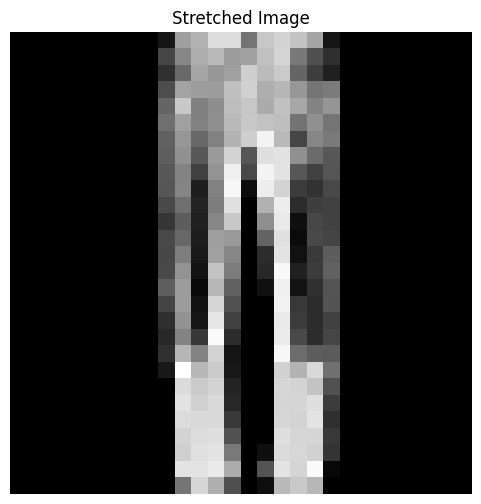

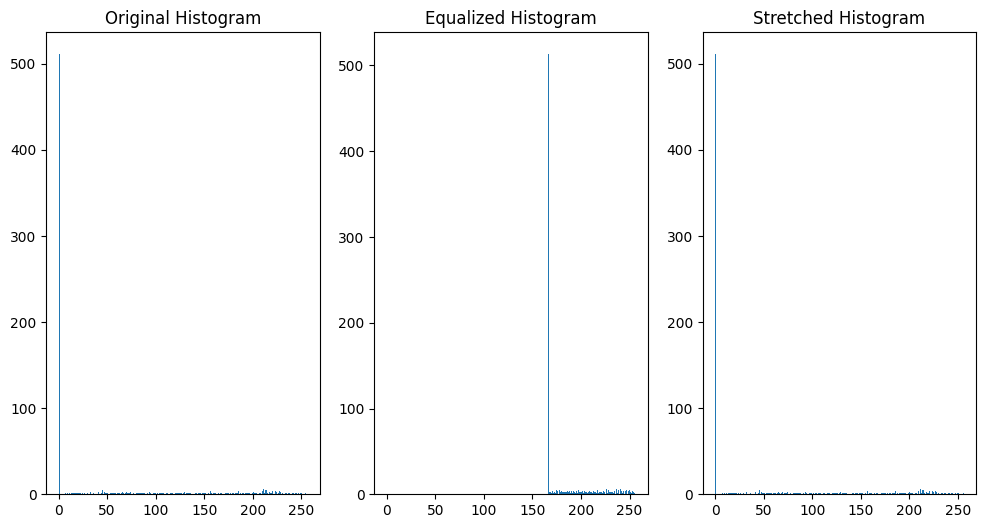

In [8]:
plt.figure(figsize=(6, 6))
plt.imshow(stretched_image, cmap='gray')
plt.title('Stretched Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(image.ravel(), 256, [0, 256])
plt.title('Original Histogram')
plt.subplot(1, 3, 2)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title('Equalized Histogram')
plt.subplot(1, 3, 3)
plt.hist(stretched_image.ravel(), 256, [0, 256])
plt.title('Stretched Histogram')
plt.show()

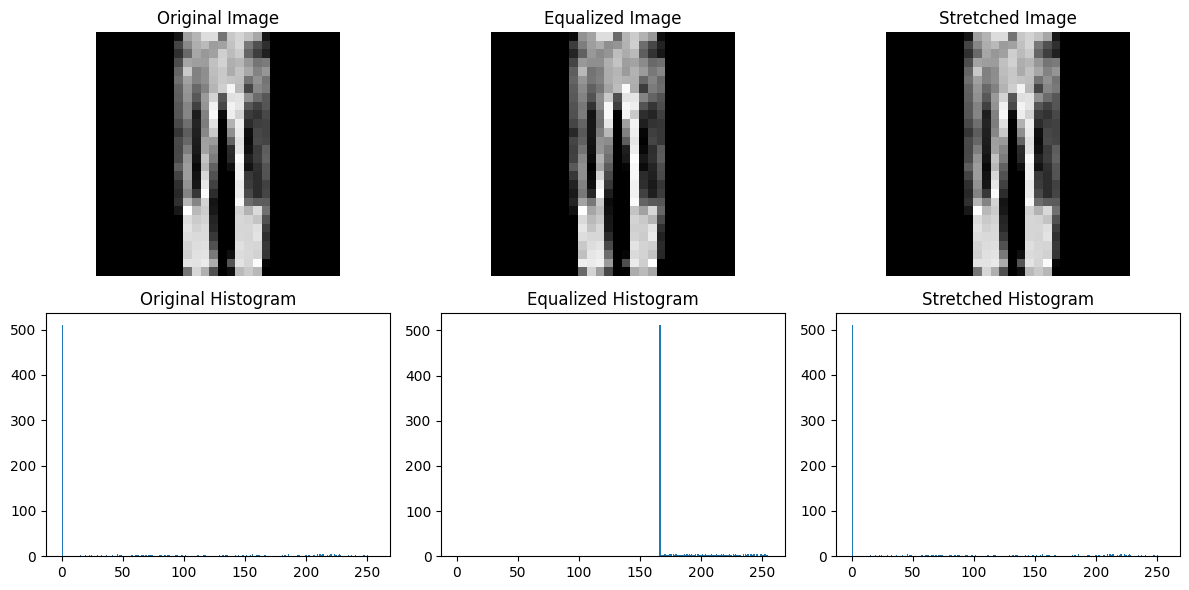

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Display the images side by side
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(stretched_image, cmap='gray')
plt.title('Stretched Image')
plt.axis('off')

# Display the histograms below the images
plt.subplot(2, 3, 4)
plt.hist(image.ravel(), 256, [0, 256])
plt.title('Original Histogram')

plt.subplot(2, 3, 5)
plt.hist(equalized_image.ravel(), 256, [0, 256])
plt.title('Equalized Histogram')

plt.subplot(2, 3, 6)
plt.hist(stretched_image.ravel(), 256, [0, 256])
plt.title('Stretched Histogram')

plt.tight_layout()
plt.show()


# Using image apart from mnist

# 2. Read and Display the Image

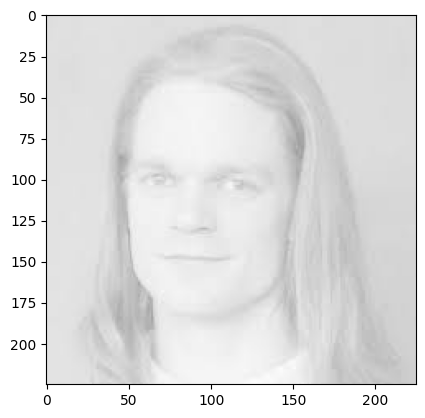

In [ ]:
img_path='/content/images.jfif'
img=cv2.imread(img_path,1)
plt.imshow(img)

# 3. Display the Color Histogram of the Original Image

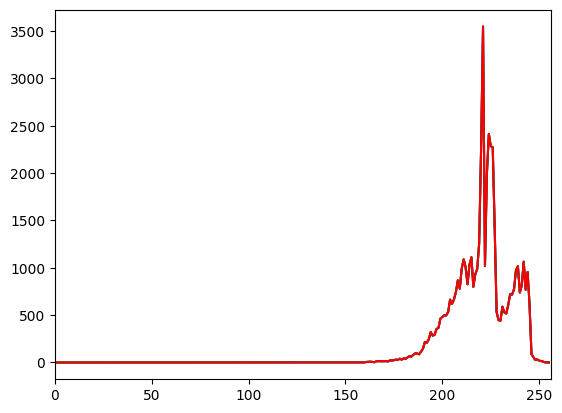

In [ ]:


import matplotlib.pyplot as plt
import cv2
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


# 4. Convert Image to NumPy Array

In [ ]:


import numpy as np
import cv2
img_array = np.array(img)
print(img_array)


[[[221 221 221]
  [222 222 222]
  [222 222 222]
  ...
  [219 219 219]
  [219 219 219]
  [219 219 219]]

 [[221 221 221]
  [222 222 222]
  [222 222 222]
  ...
  [219 219 219]
  [219 219 219]
  [219 219 219]]

 [[221 221 221]
  [222 222 222]
  [222 222 222]
  ...
  [219 219 219]
  [219 219 219]
  [219 219 219]]

 ...

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [207 207 207]
  [208 208 208]
  [207 207 207]]

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [207 207 207]
  [208 208 208]
  [207 207 207]]

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [206 206 206]
  [206 206 206]
  [209 209 209]]]


# 5. Implement Histogram Equalization from Scratch

In [ ]:
def get_pixel_frequency(image):
  pixel_frequency = np.zeros(256)
  for row in range (image.shape[0]):
    for column in range (image.shape[1]):
      pixel_val = image[row,column]
      pixel_frequency[pixel_val] += 1
  return pixel_frequency



In [ ]:
pixel_freq = get_pixel_frequency(img)
L = np.max(img)

In [ ]:
pixel_pdf = pixel_freq/np.sum(pixel_freq)
pixel_cumsum = np.cumsum(pixel_pdf)
bits_cumsum = (L-1)*pixel_cumsum
pixel_map = np.fix(bits_cumsum).astype(int)

# 6. Apply the Equalization Map to the Image

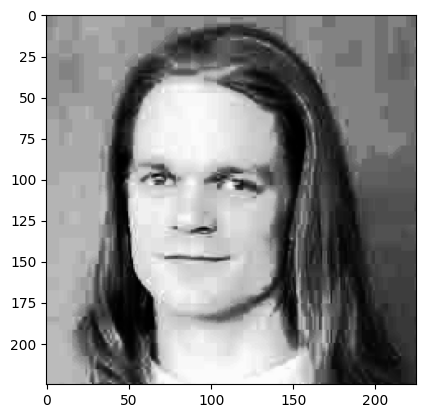

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
import cv2

output_image = np.zeros(img.shape, dtype=np.uint8)

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        pixel_val = img[row][col]
        output_image[row][col] = pixel_map[pixel_val]

plt.imshow(output_image)
plt.show()


# 7. Compare Original and Equalized Images Side-by-Side

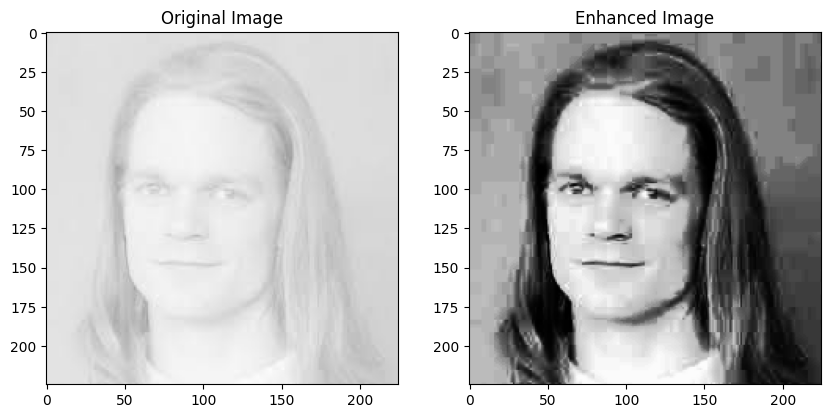

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[1].imshow(output_image)
axes[1].set_title('Enhanced Image')
plt.show()


# 8. Display Histograms of the Original and Equalized Images

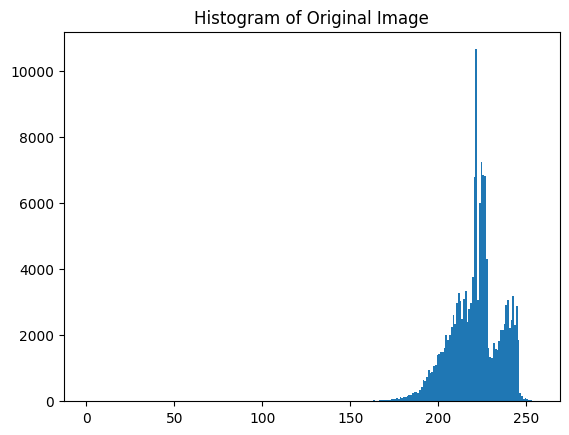

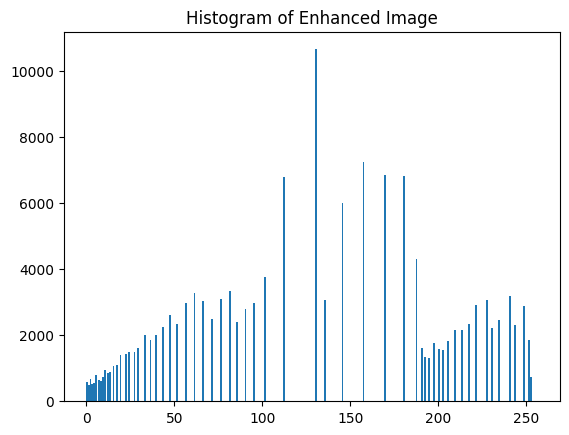

In [ ]:


import matplotlib.pyplot as plt
plt.hist(img.ravel(),256,[0,256])
plt.title('Histogram of Original Image')
plt.show()

plt.hist(output_image.ravel(),256,[0,256])
plt.title('Histogram of Enhanced Image')
plt.show()


# 9. Perform Histogram Stretching from Scratch

In [ ]:


print("Original Image Array:")
print(img_array)
print("\nEnhanced Image Array:")
print(np.array(output_image))


Original Image Array:
[[[221 221 221]
  [222 222 222]
  [222 222 222]
  ...
  [219 219 219]
  [219 219 219]
  [219 219 219]]

 [[221 221 221]
  [222 222 222]
  [222 222 222]
  ...
  [219 219 219]
  [219 219 219]
  [219 219 219]]

 [[221 221 221]
  [222 222 222]
  [222 222 222]
  ...
  [219 219 219]
  [219 219 219]
  [219 219 219]]

 ...

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [207 207 207]
  [208 208 208]
  [207 207 207]]

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [207 207 207]
  [208 208 208]
  [207 207 207]]

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [206 206 206]
  [206 206 206]
  [209 209 209]]]

Enhanced Image Array:
[[[130 130 130]
  [135 135 135]
  [135 135 135]
  ...
  [101 101 101]
  [101 101 101]
  [101 101 101]]

 [[130 130 130]
  [135 135 135]
  [135 135 135]
  ...
  [101 101 101]
  [101 101 101]
  [101 101 101]]

 [[130 130 130]
  [135 135 135]
  [135 135 135]
  ...
  [101 101 101]
  [101 101 101]
  [101 101 101]]

 ...

 [[187 

# 10. Display Histogram of the Stretched Image

Original Image Array:
[[[221 221 221]
  [222 222 222]
  [222 222 222]
  ...
  [219 219 219]
  [219 219 219]
  [219 219 219]]

 [[221 221 221]
  [222 222 222]
  [222 222 222]
  ...
  [219 219 219]
  [219 219 219]
  [219 219 219]]

 [[221 221 221]
  [222 222 222]
  [222 222 222]
  ...
  [219 219 219]
  [219 219 219]
  [219 219 219]]

 ...

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [207 207 207]
  [208 208 208]
  [207 207 207]]

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [207 207 207]
  [208 208 208]
  [207 207 207]]

 [[227 227 227]
  [227 227 227]
  [227 227 227]
  ...
  [206 206 206]
  [206 206 206]
  [209 209 209]]]

Enhanced Image Array:
[[[130 130 130]
  [135 135 135]
  [135 135 135]
  ...
  [101 101 101]
  [101 101 101]
  [101 101 101]]

 [[130 130 130]
  [135 135 135]
  [135 135 135]
  ...
  [101 101 101]
  [101 101 101]
  [101 101 101]]

 [[130 130 130]
  [135 135 135]
  [135 135 135]
  ...
  [101 101 101]
  [101 101 101]
  [101 101 101]]

 ...

 [[187 

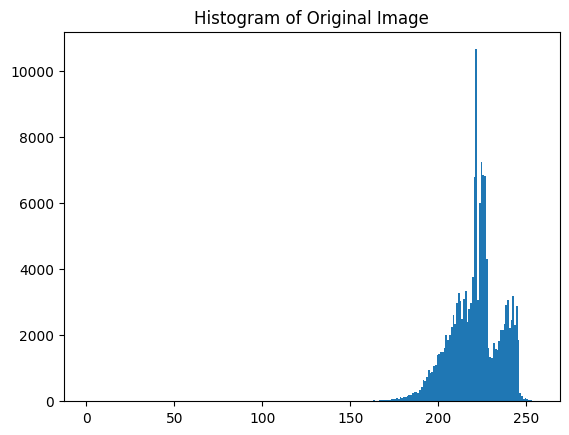

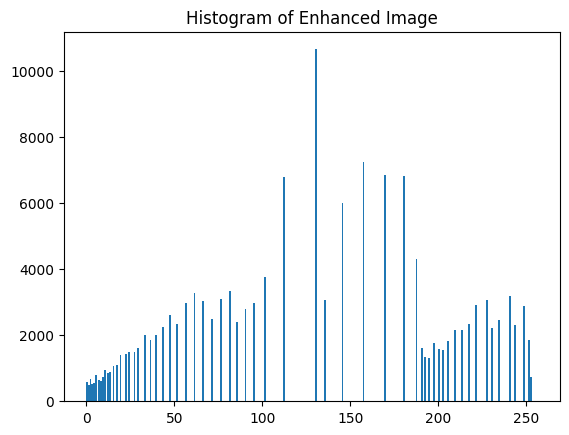

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img_array = np.array(img)
print("Original Image Array:")
print(img_array)
print("\nEnhanced Image Array:")
print(np.array(output_image))

plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram of Original Image')
plt.show()

plt.hist(output_image.ravel(), 256, [0, 256])
plt.title('Histogram of Enhanced Image')
plt.show()


# Implementation for Histogram Stretching:




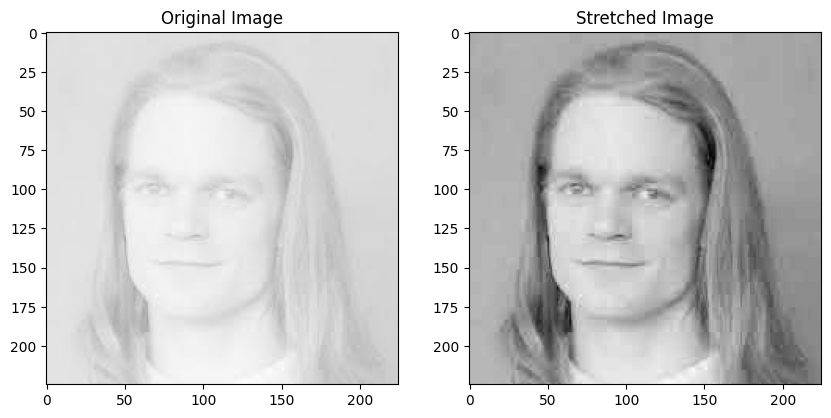

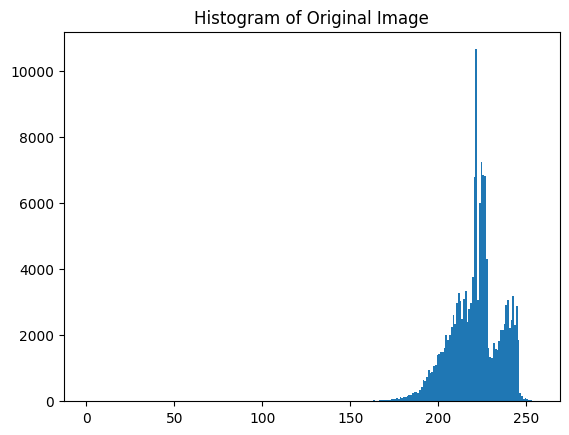

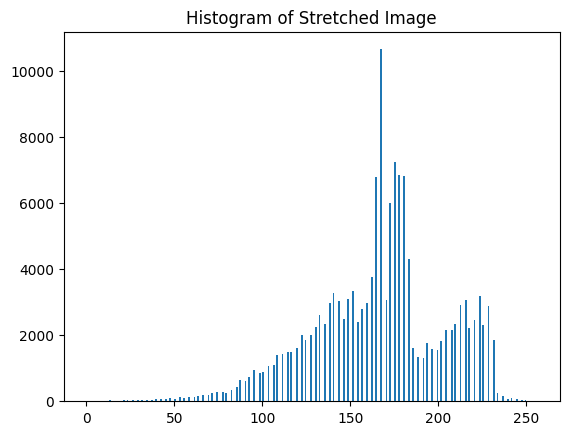

In [ ]:

def histogram_stretching(image):

    min_val = np.min(image)
    max_val = np.max(image)


    stretched_image = (image - min_val) * (255 / (max_val - min_val))
    return stretched_image.astype(np.uint8)


stretched_image = histogram_stretching(img)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[1].imshow(stretched_image)
axes[1].set_title('Stretched Image')
plt.show()

plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram of Original Image')
plt.show()

plt.hist(stretched_image.ravel(), 256, [0, 256])
plt.title('Histogram of Stretched Image')
plt.show()


### Summary

In this task, we explored two image enhancement techniques: **Histogram Equalization** and **Histogram Stretching**. These methods are used to improve image contrast, which is crucial in various image processing applications where visibility of details is essential.

1. **Histogram Equalization:**
   - Redistributes the pixel intensity values based on the cumulative distribution function (CDF) of the histogram.
   - Results in a uniform histogram where all intensity levels are equally probable, enhancing the image contrast.

2. **Histogram Stretching:**
   - Stretches the original dynamic range of pixel values to cover the full range (0-255).
   - Enhances contrast by ensuring that the minimum and maximum pixel values correspond to 0 and 255, respectively.


### Applications

1. **Medical Imaging:**
   - Enhances contrast in medical images (e.g., X-rays, MRIs) to make anomalies more visible, aiding in diagnosis.

2. **Remote Sensing:**
   - Improves the contrast of satellite images, helping in better analysis of geographical and environmental data.

3. **Photography:**
   - Used in post-processing to enhance the contrast and make images more visually appealing.

4. **Document Scanning:**
   - Enhances the contrast of scanned documents, making text clearer and more legible.


### Conclusion

- **Histogram Equalization** effectively enhances the overall contrast of the image by redistributing pixel intensities across the entire available range. It is particularly useful for images with poor contrast, where details are not easily visible. However, it can sometimes lead to over-enhancement, introducing noise and artifacts.

- **Histogram Stretching** increases the dynamic range of pixel values, leading to a linear enhancement of contrast. Unlike equalization, stretching maintains the overall shape of the original histogram, making it suitable for cases where subtle contrast improvement is desired.

Both techniques have their strengths, and the choice between them depends on the specific requirements of the application. Histogram Equalization is more aggressive in contrast enhancement, while Histogram Stretching is more conservative, making it suitable for scenarios where a more subtle contrast improvement is needed.